In [1]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

In [2]:
base_model.trainable = False

In [3]:
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(units = 512, activation='relu')(x)
outputs = keras.layers.Dense(units = 8, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 14,981,448
Trainable params: 266,760
Non-trainable params: 14,714,688
___________________________________________

In [5]:
model.compile(loss='categorical_crossentropy', 
              #optimizer='adam', 
              metrics='accuracy')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    validation_split=0.2
)


In [7]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    "../projekt-1/train",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=64,
    subset='training'
)

# load and iterate validation dataset
valid_it = datagen_train.flow_from_directory(
    "../projekt-1/train",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=64,
    subset='validation'
)

Found 3025 images belonging to 8 classes.
Found 752 images belonging to 8 classes.


In [8]:
model.fit(train_it, steps_per_epoch=12, 
          validation_data=valid_it, validation_steps=4, epochs=10)

Epoch 1/10
12/12 [==============================] - 58s 5s/step - loss: 7.6422 - accuracy: 0.3372 - val_loss: 2.8108 - val_accuracy: 0.4492
Epoch 2/10
12/12 [==============================] - 62s 5s/step - loss: 2.7384 - accuracy: 0.4596 - val_loss: 1.4537 - val_accuracy: 0.5469
Epoch 3/10
12/12 [==============================] - 63s 5s/step - loss: 2.2063 - accuracy: 0.4635 - val_loss: 1.3907 - val_accuracy: 0.5742
Epoch 4/10
12/12 [==============================] - 63s 5s/step - loss: 1.7187 - accuracy: 0.4870 - val_loss: 1.9865 - val_accuracy: 0.5625
Epoch 5/10
12/12 [==============================] - 61s 5s/step - loss: 1.5133 - accuracy: 0.5811 - val_loss: 2.2334 - val_accuracy: 0.3281
Epoch 6/10
12/12 [==============================] - 62s 5s/step - loss: 1.3581 - accuracy: 0.5651 - val_loss: 1.6972 - val_accuracy: 0.5625
Epoch 7/10
12/12 [==============================] - 62s 5s/step - loss: 1.3084 - accuracy: 0.5898 - val_loss: 1.4501 - val_accuracy: 0.6055
Epoch 8/10
12/12 [==

In [9]:
base_model.trainable = True

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss='categorical_crossentropy',
              metrics='accuracy')

In [10]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=10)

Epoch 1/10
12/12 [==============================] - 185s 15s/step - loss: 0.8484 - accuracy: 0.6921 - val_loss: 0.6957 - val_accuracy: 0.7617
Epoch 2/10
12/12 [==============================] - 204s 17s/step - loss: 0.5870 - accuracy: 0.8073 - val_loss: 0.6243 - val_accuracy: 0.7656
Epoch 3/10
12/12 [==============================] - 193s 16s/step - loss: 0.5004 - accuracy: 0.8203 - val_loss: 0.6004 - val_accuracy: 0.8086
Epoch 4/10
12/12 [==============================] - 178s 15s/step - loss: 0.5403 - accuracy: 0.8350 - val_loss: 0.5493 - val_accuracy: 0.8438
Epoch 5/10
12/12 [==============================] - 178s 15s/step - loss: 0.4452 - accuracy: 0.8516 - val_loss: 0.6299 - val_accuracy: 0.8125
Epoch 6/10
12/12 [==============================] - 177s 15s/step - loss: 0.4911 - accuracy: 0.8391 - val_loss: 0.6122 - val_accuracy: 0.7852
Epoch 7/10
12/12 [==============================] - 188s 16s/step - loss: 0.4185 - accuracy: 0.8698 - val_loss: 0.5332 - val_accuracy: 0.8633
Epoch 

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

array([[9.42497551e-01, 2.44533894e-05, 1.14243406e-07, 4.25648183e-09,
        4.34771553e-02, 3.64592658e-08, 1.49710182e-08, 1.40006607e-02]],
      dtype=float32)

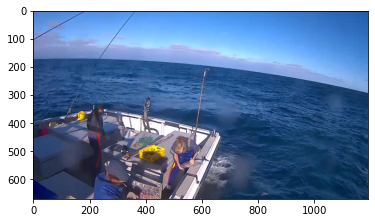

In [14]:
make_predictions('../projekt-1/train/ALB/img_00032.jpg')

In [15]:
model.save('vgg16_fish_model')

INFO:tensorflow:Assets written to: vgg16_fish_model\assets
